<H1>Taller 1 EDA PREGUNTA SMART</h1>

<h3>Problema</h3>En un sistema de medición que abarca hasta 100,000 equipos — incluyendo medidores, sensores y equipos de comunicación — distribuidos en varias ciudades del país, los mecanismos para identificar equipos en falla tardan más de 10 días y se basan en factores externos a la red, lo que resulta en un desgaste innecesario en áreas que no requieren mantenimiento..
<h3>Pregunta SMART</h3><b>¿Cuáles equipos específicos del sistema de medición inteligente han presentado fallas individuales o del sistema en los últimos 3 meses y requieren mantenimiento correctivo?</b>
<h3>Cómo la ciencia de datos puede ofrecer una solución</h3>La ciencia de datos puede ofrecer una solución efectiva. Dado que disponemos de información sobre el funcionamiento de los equipos, podemos emplear análisis predictivo para identificar las condiciones en las que un medidor comunica correctamente o presenta problemas. Además, el uso de algoritmos de detección de anomalías puede ayudar a identificar datos inusuales. Así, la ciencia de datos permite optimizar los recursos y mejorar el mantenimiento preventivo y correctivo, reduciendo así los costos asociados.

<H1>Taller 2 EDA ANÁLISIS UNIVARIADO</H1>

In [2]:
# bibliotecas para manipulación de datos
import pandas as pd

# bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
#se carga el dataset
#Se agrega la opción dtype='unicode' porque se generó el error : 'DtypeWarning: Columns (0,1,5,8) have mixed types. Specify dtype option on import or set low_memory=False.'
#Se agrega opción para evitar warning

df = pd.read_csv('exportBDeda.csv',dtype='unicode',low_memory=False)

In [22]:
#Se revisa la cabecera y los primeros datos, se observa valores nulos en algunas columnas y hay una columna channel que contiene el valor de la variable que se está leyendo.
#La columna status tiene un valor Unknown que se debe tratar como un NaN
df.head()

,METER_NO,MEASURING_POINT,STATUS,DATE_TIME,CHANNEL,DATA_VALUE,UNIT_MEASUREMENT,CODE_OBIS,TRANSFORMER,REGION
0,9b3a007f,788353f5,StockPending,2024/04/29 18:20:00,Import kWh,0.14,kWh,1.0.1.8.0.255,b79a2310,89c6e3b1
1,9b3a007f,788353f5,StockPending,2024/04/29 18:50:00,Interval-LP Import kVarh,0.0,kVarh,1.0.3.29.0.255,b79a2310,89c6e3b1
2,9b3a007f,788353f5,StockPending,2024/04/29 19:15:00,Export kWh,0.065,kWh,1.0.2.8.0.255,b79a2310,89c6e3b1
3,9b3a007f,788353f5,StockPending,2024/04/29 20:40:00,Interval-LP Import kWh,0.0,kWh,1.0.1.29.0.255,b79a2310,89c6e3b1
4,9b3a007f,788353f5,StockPending,2024/04/29 21:20:00,Interval-LP Import kWh,0.0,kWh,1.0.1.29.0.255,b79a2310,89c6e3b1


In [5]:
#al observar los últimos datos se observan valores válidos para variables como transformer,region,measuring_point y status.
df.tail()

,METER_NO,MEASURING_POINT,STATUS,DATE_TIME,CHANNEL,DATA_VALUE,UNIT_MEASUREMENT,CODE_OBIS,TRANSFORMER,REGION
456273,ca5405f5,ca5405f5,InstallWithActive,2024/01/02 02:00:00,L2 Last average current,0.44,A,1.0.51.25.0.255,a1119d11,4e15a7ca
456274,ca5405f5,ca5405f5,InstallWithActive,2024/01/03 00:00:00,Import kWh,2522.605,kWh,1.0.1.8.0.255,a1119d11,4e15a7ca
456275,ca5405f5,ca5405f5,InstallWithActive,2024/01/03 01:00:00,L2 Last average current,0.48,A,1.0.51.25.0.255,a1119d11,4e15a7ca
456276,ca5405f5,ca5405f5,InstallWithActive,2024/01/03 03:00:00,L3 Last average voltage,124.9,V,1.0.72.25.0.255,a1119d11,4e15a7ca
456277,ca5405f5,ca5405f5,InstallWithActive,2024/01/02 08:00:00,L3 Last average current,0.72,A,1.0.71.25.0.255,a1119d11,4e15a7ca


In [6]:
#Tamaño del dataset
df.shape

(456278, 10)

In [7]:
#Validamos valores duplicados
df.duplicated().sum()

np.int64(0)

In [8]:
#Eliminamos duplicados
df.drop_duplicates(inplace=True)

In [9]:
#Validamos nuevamente valores duplicados
df.duplicated().sum()

np.int64(0)

In [34]:
#Al revisar con el ingeniero de datos observa que las columnas channel,unit_measurenment,code_obis son directamente extraidas de una tabla categorica por lo que para el ánalisis solo es
#una de estas 3 columnas, la llave es code_obis por lo que se procede a eliminar las columnas unit_measurement y channel

df.drop(columns=['CHANNEL','UNIT_MEASUREMENT'],inplace=True)


In [31]:
#De acuerdo con el negocio solo se está interesado en medidores con status InstallWithActive, ya que un medidor en estado diferente a InstallWithActive quiere decir que no se encuentra en opercaión
#son medidores retirados o en pruebas.

#Se eliminan las filas con medidores inactivos.

df.drop(df[df['STATUS'] != 'InstallWithActive'].index,inplace=True)

In [37]:
#Al revisar los valores de los canales, el canal primario que es Import kWh está en cuarta posición, se esperaba que esté de primero debido a que todos los medidores sin exepción deben tener este canal
#Por lo tanto, se concluye que hay pérdida de datos por ausencia de canales. 
# 
# 2024-09-01 -> Con la limpieza de datos propuesta y focalizandose en los medidores activos la calidad de en los canales mejora.
df.CODE_OBIS.value_counts()

CODE_OBIS
1.0.2.29.0.255     21577
1.0.3.4.0.255      21577
1.0.72.25.0.255    21577
1.0.4.29.0.255     21577
1.0.32.25.0.255    21577
1.0.3.8.0.255      21577
1.0.52.25.0.255    21577
1.0.4.8.0.255      21577
1.0.51.25.0.255    21577
1.0.2.4.0.255      21577
1.0.4.4.0.255      21577
0.0.96.12.5.255    21577
1.0.1.29.0.255     21577
1.0.31.25.0.255    21577
1.0.1.4.0.255      21577
1.0.71.25.0.255    21577
1.0.2.8.0.255      21577
1.0.3.29.0.255     21577
0.0.96.10.1.255    21577
1.0.1.8.0.255      21566
0.0.96.10.2.255      902
Name: count, dtype: int64

In [12]:
#Pivotar el DataFrame 
#Se hace el pivot para poder trabajar con información estadistica sobre cualquier variable, además que si falta un canal se puede estimar en base a los otros 
df_pivot = df.pivot_table(index=['METER_NO','DATE_TIME'],
                          columns='CHANNEL',
                          values='DATA_VALUE',
                          aggfunc='sum').reset_index()

# Eliminar la jerarquía de las columnas ???
df_pivot.columns.name = None


In [13]:
#Se eliminan las variables que tienen muy poca frecuencia

df_pivot.drop(columns=df.CHANNEL.value_counts()[df.CHANNEL.value_counts() < 10000].index,inplace=True)

In [14]:
df_pivot.shape

(24228, 22)

In [15]:
df_pivot.head()

,METER_NO,DATE_TIME,Billing Status 2,DemandForActiveExportPower,DemandForActiveImportPower,DemandForReactiveExportPower,DemandForReactiveImportPower,Export kVarh,Export kWh,Import kVarh,...,Interval-LP Export kWh,Interval-LP Import kVarh,Interval-LP Import kWh,L1 Last average current,L1 Last average voltage,L2 Last average current,L2 Last average voltage,L3 Last average current,L3 Last average voltage,Signal strength
0,279e5093,2024/01/01 00:00:00,0.0,0.0,0.188,0.0,0.046,0.342,0.001,240.308,...,0.0,0.049,0.202,0.86,129.9,0.0,129.2,0.69,129.1,20.0
1,279e5093,2024/01/01 01:00:00,0.0,0.0,0.178,0.0,0.06,0.342,0.001,240.355,...,0.0,0.047,0.182,0.73,129.4,0.0,128.5,0.67,128.3,19.0
2,279e5093,2024/01/01 02:00:00,0.0,0.0,0.149,0.0,0.057,0.342,0.001,240.397,...,0.0,0.042,0.15,0.72,129.6,0.0,128.7,0.56,128.6,19.0
3,279e5093,2024/01/01 03:00:00,0.0,0.0,0.12,0.0,0.036,0.342,0.001,240.436,...,0.0,0.039,0.128,0.54,129.9,0.0,128.9,0.44,128.9,18.0
4,279e5093,2024/01/01 04:00:00,0.0,0.0,0.118,0.0,0.044,0.342,0.001,240.474,...,0.0,0.038,0.112,0.54,130.1,0.0,129.0,0.36,129.0,18.0


In [16]:
#Se analiza la variable DATE_TIME
df_pivot.dtypes

METER_NO                        object
DATE_TIME                       object
Billing Status 2                object
DemandForActiveExportPower      object
DemandForActiveImportPower      object
DemandForReactiveExportPower    object
DemandForReactiveImportPower    object
Export kVarh                    object
Export kWh                      object
Import kVarh                    object
Import kWh                      object
Interval-LP Export kVarh        object
Interval-LP Export kWh          object
Interval-LP Import kVarh        object
Interval-LP Import kWh          object
L1 Last average current         object
L1 Last average voltage         object
L2 Last average current         object
L2 Last average voltage         object
L3 Last average current         object
L3 Last average voltage         object
Signal strength                 object
dtype: object

In [17]:
#Ajustamos la columna de fecha a datetime
df_pivot['DATE_TIME'] = pd.to_datetime(df_pivot['DATE_TIME'])


In [18]:
df_pivot.dtypes

METER_NO                                object
DATE_TIME                       datetime64[ns]
Billing Status 2                        object
DemandForActiveExportPower              object
DemandForActiveImportPower              object
DemandForReactiveExportPower            object
DemandForReactiveImportPower            object
Export kVarh                            object
Export kWh                              object
Import kVarh                            object
Import kWh                              object
Interval-LP Export kVarh                object
Interval-LP Export kWh                  object
Interval-LP Import kVarh                object
Interval-LP Import kWh                  object
L1 Last average current                 object
L1 Last average voltage                 object
L2 Last average current                 object
L2 Last average voltage                 object
L3 Last average current                 object
L3 Last average voltage                 object
Signal streng

<Axes: >

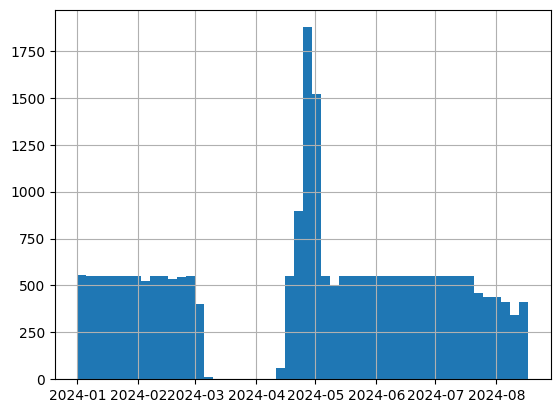

In [19]:
#Analizamos la columna datetime
df_pivot['DATE_TIME'].hist(bins=50)

In [20]:
#CONLUSIONES

#COLUMNA DATETIME
#Al hacer el ánalisis univariable de la columna DATE_TIME se evidencia que hora a hora se pierde información de los medidores, el sistema transaccional en sí debería recuperar la información
#sin embargo, se considera conveniente trabajar en estimaciones sobre los valores nulos para tener un dataset más completo para obtener anomalías más díficiles de detectar basadas en la medida y la integridad de los datos

